In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats as sm_stat
import statsmodels.tsa as smt
import scipy.optimize as optimize
import statsmodels.formula.api as smf
from datetime import datetime

In [9]:
alum_sos = pd.read_csv('share of search/alum_sos_after2015.csv')
alum_sales = pd.read_csv('Data with product/ALUSUL08_month_sale.csv')
alum_sales

,Unnamed: 0,Delivery Date,Quantity in L
0,0,2010-01,4.662130e+06
1,1,2010-02,6.914690e+06
2,2,2010-03,8.487764e+06
3,3,2010-04,6.682389e+06
4,4,2010-05,7.258439e+06
...,...,...,...
132,132,2021-01,5.487424e+06
133,133,2021-02,4.805699e+06
134,134,2021-03,5.647164e+06
135,135,2021-04,3.087969e+06


In [18]:
alum_sos['date'] = pd.to_datetime(alum_sos['date'])
alum_sos['date'] = alum_sos['date'].dt.strftime('%Y-%m')
alum_sos

,Unnamed: 0,date,Ixom,Coogee Chemicals,Cleveland Bay Chemicals,Nalco Water,Omega Chemicals,isPartial,sos
0,0,2015-03,45,0,0,42,18,False,0.428571
1,1,2015-04,41,0,0,0,0,False,1.000000
2,2,2015-05,0,0,0,31,0,False,0.000000
3,3,2015-06,0,24,0,0,0,False,0.000000
4,4,2015-07,53,25,0,0,0,False,0.679487
...,...,...,...,...,...,...,...,...,...
80,80,2021-11,0,16,0,0,47,False,0.000000
81,81,2021-12,0,0,0,0,17,False,0.000000
82,82,2022-01,22,32,0,0,20,False,0.297297
83,83,2022-02,82,0,0,0,38,False,0.683333


In [19]:
alum_sos_sales = pd.merge(alum_sos, alum_sales,how='left',left_on='date',right_on='Delivery Date')
alum_sos_sales

,Unnamed: 0_x,date,Ixom,Coogee Chemicals,Cleveland Bay Chemicals,Nalco Water,Omega Chemicals,isPartial,sos,Unnamed: 0_y,Delivery Date,Quantity in L
0,0,2015-03,45,0,0,42,18,False,0.428571,62.0,2015-03,9.420623e+06
1,1,2015-04,41,0,0,0,0,False,1.000000,63.0,2015-04,8.051281e+06
2,2,2015-05,0,0,0,31,0,False,0.000000,64.0,2015-05,8.247927e+06
3,3,2015-06,0,24,0,0,0,False,0.000000,65.0,2015-06,7.868161e+06
4,4,2015-07,53,25,0,0,0,False,0.679487,66.0,2015-07,6.626636e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
80,80,2021-11,0,16,0,0,47,False,0.000000,NaN,NaN,NaN
81,81,2021-12,0,0,0,0,17,False,0.000000,NaN,NaN,NaN
82,82,2022-01,22,32,0,0,20,False,0.297297,NaN,NaN,NaN
83,83,2022-02,82,0,0,0,38,False,0.683333,NaN,NaN,NaN


In [27]:
alum_sos_sales = alum_sos_sales[:75]

In [35]:
sample_data = alum_sos_sales[['date','sos','Quantity in L']]
sample_data = sample_data.rename(columns={"Quantity in L": "Quantity"})
sample_data

,date,sos,Quantity
0,2015-03,0.428571,9.420623e+06
1,2015-04,1.000000,8.051281e+06
2,2015-05,0.000000,8.247927e+06
3,2015-06,0.000000,7.868161e+06
4,2015-07,0.679487,6.626636e+06
...,...,...,...
70,2021-01,0.000000,5.487424e+06
71,2021-02,0.492063,4.805699e+06
72,2021-03,0.522388,5.647164e+06
73,2021-04,0.355932,3.087969e+06


<Figure size 432x288 with 0 Axes>

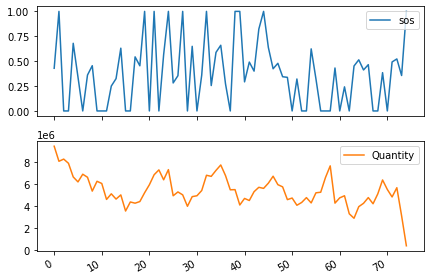

In [36]:
fig = plt.figure()
sample_data.plot(subplots=True, layout=(2,1))
plt.legend()
plt.tight_layout()
plt.show()

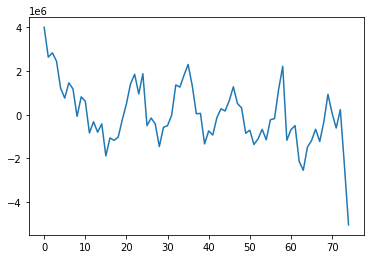

In [56]:
_q = (sample_data['Quantity'] - sample_data['Quantity'].mean()).plot()

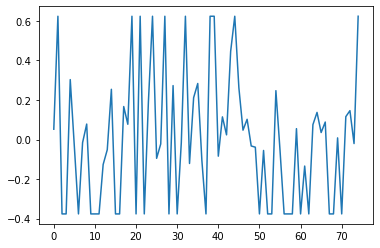

In [57]:
_s = (sample_data['sos'] - sample_data['sos'].mean()).plot()

In [53]:
def lag(x, n):
    if n == 0:
        return x
    if isinstance(x, pd.Series):
        return x.shift(n) 
    else:
        x = pd.Series(x)
        return x.shift(n) 

    x = x.copy()
    x[n:] = x[0:-n]
    x[:n] = np.nan
    return x

mod_L3_est = smf.ols(formula = 'Quantity ~ 1 + lag(sos, 3)', data = sample_data)
mod_L3_fit = mod_L3_est.fit()
print(mod_L3_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     5.464
Date:                Sat, 24 Sep 2022   Prob (F-statistic):             0.0223
Time:                        16:19:55   Log-Likelihood:                -1111.5
No. Observations:                  72   AIC:                             2227.
Df Residuals:                      70   BIC:                             2231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      4.9e+06   2.19e+05     22.412      

In [54]:
print(np.round(mod_L3_est.params, 4))
print(np.round(mod_L3_est.pvalues, 4))

AttributeError: 'OLS' object has no attribute 'params'